# PYTHON DATA ANALYTICS PORTFOLIO PROJECT

MOVIES DATASET: DATA CLEANING AND CORREALATION


In [293]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\mkaan\OneDrive\Documents\DATA ANALYTICS\PYTHON\movies.csv')

In [294]:
pd.set_option('display.max_rows', None)

In [295]:
print(df.shape)
df.head()

(7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [296]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [297]:
# Check for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [298]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [299]:
# Fill missing numeric values with means

df['budget'] = df['budget'].fillna(df['budget'].mean())
df['score'] = df['score'].fillna(df['score'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

In [300]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [301]:
# Drop observations with missing categorical values

df = df.dropna()

In [302]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [303]:
# Change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [304]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [305]:
# Some 'released' and 'year' values display different years
# Isolate year from 'released' column and use it to replace 'year' column

released_df = df['released'].str.split(' ',n = 3,expand = True)
released_df.rename(columns={0: 'month', 1: 'day', 2: 'year', 3: 'country'}, inplace = True)

# Insert new year column
df['released_year'] = released_df['year']

# drop old year column
df.drop(['year'], axis = 1, inplace = True)

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [306]:
# Split 'released' into date and country columns

rel2 = released_df = df['released'].str.split('(',n = 1,expand = True)
rel2.rename(columns = {0: 'release_date', 1: 'country'}, inplace = True)

# Change 'date' column type to datetime
rel2['release_date'] = pd.to_datetime(rel2['release_date'])

# Insert 'date' date 'country' columns
df['release_date'] = rel2['release_date']
df['released_country'] = rel2['country']

# Drop 'released' column
df.drop(['released'], axis = 1, inplace = True)

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,release_date,released_country
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980-06-13,United States)
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20,United States)
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02,United States)
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25,United States)


In [307]:
# Check for duplicates

duplicate = df[df.duplicated()]
duplicate

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,release_date,released_country


In [308]:
# Observe correalation between 'Budget' and 'Gross'

Text(0, 0.5, 'Gross')

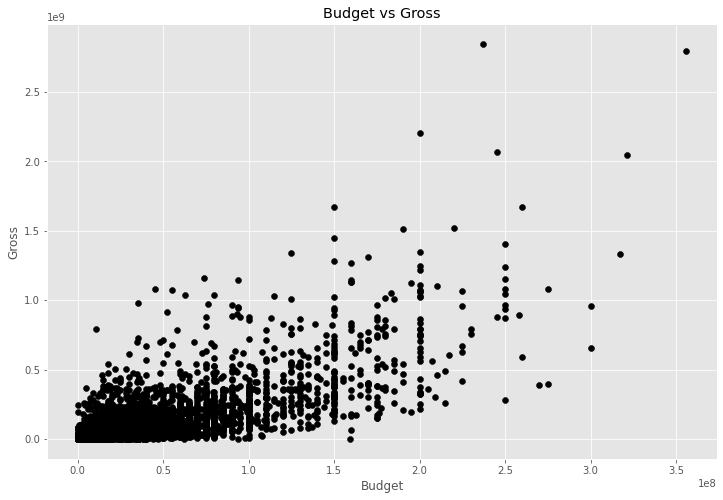

In [309]:
# Scatter plot

plt.scatter(df['budget'], df['gross'], color = 'black')

plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

<AxesSubplot:xlabel='budget', ylabel='gross'>

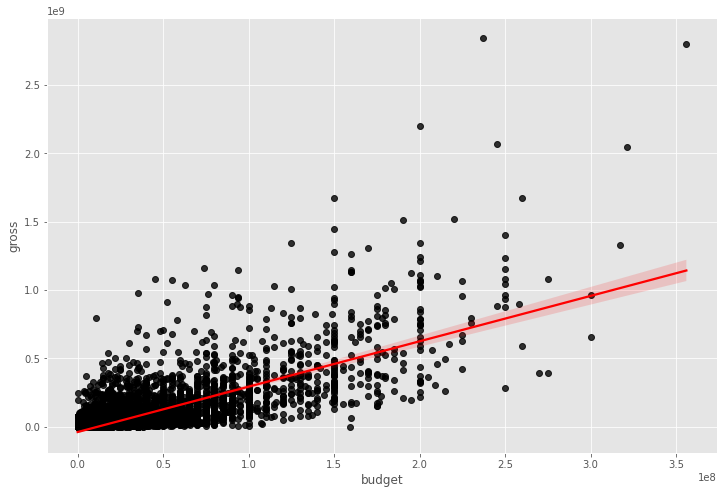

In [310]:
# Seaborn regression plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

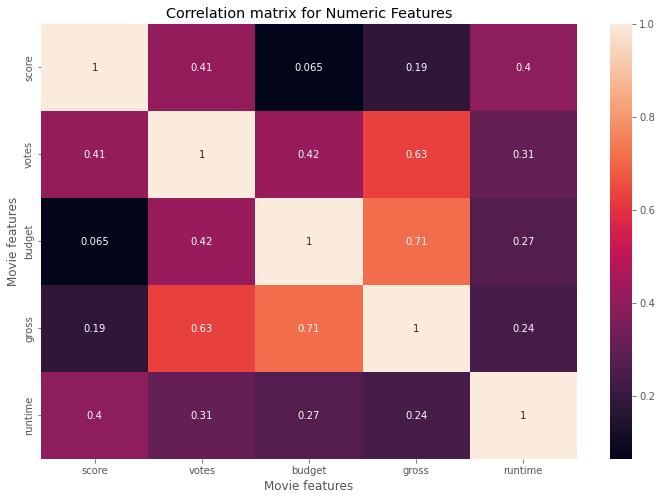

In [311]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()